In [38]:
from function import data_log_to_matrix
swarm = data_log_to_matrix('HelloWorld/results/data/experiment_ae/20/001',10)
print(swarm.shape)
swarm = np.swapaxes(swarm, 0, 1)
print(swarm.shape)

(10, 899, 3)
(899, 10, 3)


video end:2024-12-16-20:32:29


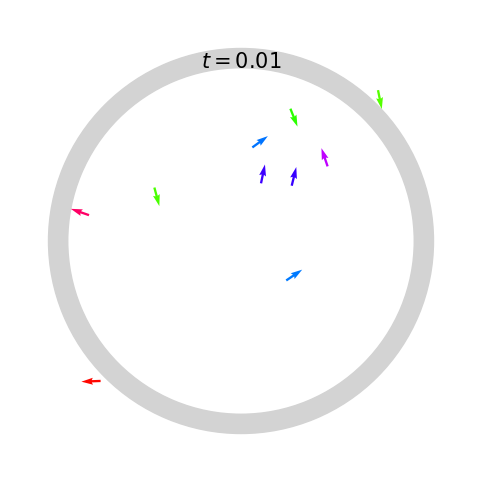

In [40]:
# video
import time,sys,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import scienceplots

parameter = {
    "swarm_N": 10,
    "agent_l0": [0.1],
    "agent_v0": [0.03],
    "agent_r": [0.0],
    "agent_dr": [0.0],
    "simulate_repeat": 1,
    "time_tick": 0.01,
    "space_x": 2,
    "space_y": 2,
    "circle_radius": 0.9,
}
snapshots = 89


def quiver_updata(tick, ax,boundary,quiver_xy, quiver_u, quiver_v, quiver_color,simulate_tick):
    plt.cla()
    plt.xlim(-parameter["space_x"]/2 - 2*parameter["agent_l0"][0],parameter["space_x"]/2 + 2*parameter["agent_l0"][0])
    plt.ylim(-parameter["space_y"]/2 - 2*parameter["agent_l0"][0],parameter["space_y"]/2 + 2*parameter["agent_l0"][0])
    # 绘制运动空间边界
    if boundary == "rough":
        for agent_N in range(parameter["swarm_N"],swarm.shape[1]):
            circle = plt.Circle(xy=(swarm[0,agent_N,0],swarm[0,agent_N,1]),radius=parameter["boundaryAgent_l0"]/2,edgecolor='lightgray', linestyle="-", facecolor='lightgray', fill=True)
            plt.gcf().gca().add_artist(circle)
    elif boundary == "smooth":
        # 创建圆环
        circle_ani = patches.Wedge(center=(0, 0), r=parameter['circle_radius']+parameter['agent_l0'][0], theta1=0, theta2=360, width=parameter['agent_l0'][0],  # 圆环的宽度
            edgecolor='lightgray', linestyle="-", facecolor='lightgray')  # 设置为'none'以使圆环内部透明
        ax.add_patch(circle_ani)
    quiver_ani = plt.quiver(quiver_xy[tick,:,0], quiver_xy[tick,:,1], quiver_u[tick,:]*0.1, quiver_v[tick,:]*0.1,
                            quiver_color[tick,:],norm=plt.Normalize(vmin=-np.pi, vmax=np.pi),cmap="hsv",angles='xy', scale_units='xy', scale=1,width=0.005)    
    # 绘制标注
    if parameter["swarm_N"] == 400:
        text_ani = plt.text(0,12,r"$t = $"+"{:.2f}".format(parameter['time_tick']*simulate_tick[tick]),horizontalalignment="center",fontsize=15)
        # plt.text(6.8,10.5,r'$P = {:.3f}$'.format(P),horizontalalignment="left",fontsize=15)
        # plt.text(6.8,9.5,r'$M = {:.3f}$'.format(M),horizontalalignment="left",fontsize=15)
        # plt.text(7.5,9,r'$Q = {:.3f}$'.format(Q),horizontalalignment="left",fontsize=15)
    elif parameter["swarm_N"] == 1600:
        text_ani = plt.text(0,24,r"$t = $"+"{:.2f}".format(parameter['time_tick']*simulate_tick[tick]),horizontalalignment="center",fontsize=15)
        # plt.text(13.6,21,r'$P = {:.3f}$'.format(P),horizontalalignment="left",fontsize=15)
        # plt.text(13.6,19,r'$M = {:.3f}$'.format(M),horizontalalignment="left",fontsize=15)
        # plt.text(7.5,9,r'$Q = {:.3f}$'.format(Q),horizontalalignment="left",fontsize=15)
    elif parameter["swarm_N"] == 6400:
        text_ani = plt.text(0,48,r"$t = $"+"{:.2f}".format(parameter['time_tick']*simulate_tick[tick]),horizontalalignment="center",fontsize=15)
        # plt.text(27.2,42,r'$P = {:.3f}$'.format(P),horizontalalignment="left",fontsize=15)
        # plt.text(27.2,38,r'$M = {:.3f}$'.format(M),horizontalalignment="left",fontsize=15)
        # plt.text(7.5,9,r'$Q = {:.3f}$'.format(Q),horizontalalignment="left",fontsize=15)
    else:
        text_ani = plt.text(0,parameter["circle_radius"],r"$t = $"+"{:.2f}".format(parameter['time_tick']*simulate_tick[tick]),horizontalalignment="center",fontsize=15)
    plot_text(2)

def plot_text(scale):
    if parameter["swarm_N"] == 400:
        y = -8.5
        x_min = 8.5
        length = 2
        plt.hlines(y=y,  xmin = x_min, xmax = x_min+length, colors="black", ls="-", lw=2*scale, label='%d km' % (length))
        plt.vlines(x = x_min, ymin = y-0.45, ymax = y+0.45, colors="black", ls="-", lw=2*scale)
        plt.vlines(x = x_min+length, ymin = y-0.45, ymax = y+0.45, colors="black", ls="-", lw=2*scale)
        plt.text(x_min+length/2,y-0.5,fr"${length}l_{0}$",horizontalalignment = 'center',verticalalignment = 'top',fontsize=15*scale)  
    elif parameter["swarm_N"] == 1600:
        y = -16.5
        x_min = 16.5
        length = 4
        plt.hlines(y=y,  xmin = x_min, xmax = x_min+length, colors="black", ls="-", lw=2*scale, label='%d km' % (length))
        plt.vlines(x = x_min, ymin = y-0.9, ymax = y+0.9, colors="black", ls="-", lw=2*scale)
        plt.vlines(x = x_min+length, ymin = y-0.9, ymax = y+0.9, colors="black", ls="-", lw=2*scale)
        plt.text(x_min+length/2,y-1.0,fr"${length}l_{0}$",horizontalalignment = 'center',verticalalignment = 'top',fontsize=15*scale) 
    elif parameter["swarm_N"] == 6400:
        y = -36.5
        x_min = 28
        length = 8
        plt.hlines(y=y,  xmin = x_min, xmax = x_min+length, colors="black", ls="-", lw=2*scale, label='%d km' % (length))
        plt.vlines(x = x_min, ymin = y-1.8, ymax = y+1.8, colors="black", ls="-", lw=2*scale)
        plt.vlines(x = x_min+length, ymin = y-1.8, ymax = y+1.8, colors="black", ls="-", lw=2*scale)
        plt.text(x_min+length/2,y-2,fr"${length}l_{0}$",horizontalalignment = 'center',verticalalignment = 'top',fontsize=15*scale)  
    # 图片属性
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    # plt.tight_layout()

def video_circle_rough_homo_start_end(boundary,parameter,swarm, tick_start, tick_end, tick_interval):   
    fig,ax = plt.subplots(figsize=(6,6))
    config = {
        "font.family": 'sans-serif',
        "font.serif": ['Arial', ],
        "font.size": 15,
    }
    plt.rcParams.update(config)

    # 绘制活性个体
    quiver_xy = swarm[:,:parameter["swarm_N"],0:2]
    quiver_u = np.cos(swarm[:,:parameter["swarm_N"],2])
    quiver_v = np.sin(swarm[:,:parameter["swarm_N"],2])
    # quiver_color = np.zeros(shape=(quiver_u.shape[0],quiver_u.shape[1]))
    quiver_color = swarm[:,:parameter["swarm_N"],2]
    # 绘制标注
    simulate_tick = (np.arange(snapshots) + 1) * tick_interval + tick_start
    # 生成保存视频
    ani = animation.FuncAnimation(fig=fig,func=quiver_updata,frames=np.arange(0,snapshots),fargs=(ax,boundary,quiver_xy, quiver_u, quiver_v, quiver_color,simulate_tick),interval=100)
    ani.save("N={}_l0={:.4f}_v0={:.4f}_R={:.4f}_Dr={:.4f}_repeat={}_video_start{}_end{}_interval{}.gif".format(parameter["swarm_N"],parameter["agent_l0"][0],parameter["agent_v0"][0],parameter["agent_r"][0],parameter["agent_dr"][0],parameter["simulate_repeat"],tick_start,tick_end,tick_interval))
    print("video end:{}".format(time.strftime("%Y-%m-%d-%H:%M:%S", time.localtime())))
    
video_circle_rough_homo_start_end("smooth",parameter,swarm,0,89,1)